In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
path = Path('/home/ubuntu/data/autopsy/milestone/no_preprocessing')

In [4]:
df = pd.read_csv(path/'data.csv')
df.head()

,label,text,is_valid
0,Homicide,\n.MICRO.\nHEART: acute hemorrhages in the epi...,False
1,Suicide,\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging...,False
2,Homicide,\n.MICRO.\nLIVER: Moderate macrovesicular stea...,False
3,Homicide,\n.MICRO.\nHeart:\nNo significant histopatholo...,False
4,Homicide,\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirear...,False


In [5]:
df['text'][1]

'\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nPartially encircling the neck is a 0.75 cm brown abraded ligature furrow which anteriorly passes over the thyroid cartilage and cants upwards and backwards toward the nape of the neck lying 6.0 cm below the right ear and 3.0 cm below the left ear. No other neck trauma is present. Accompanying the body is a green electrical cord ligature which correlates with the ligature furrow of the neck. \n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nOn the left anterior forehead is a 1.0 cm linear red abrasion,.'

In [6]:
bs=32

In [7]:
data_lm = TextLMDataBunch.from_csv(path, 'data.csv')

In [8]:
data_lm.show_batch()

idx,text
0,"xxbos \n xxup .micro . \n\n xxup heart : xxmaj no significant histopathologic abnormality . \n\n xxup lungs : xxmaj vascular congestion , focal areas of the right lung with blood within alveoli . \n\n xxup kidneys : xxmaj no significant histopathologic abnormality . \n\n xxup liver : xxmaj liver parenchyma with a mildly increased number of lymphocytes in the portal triads . \n\n xxmaj oral , xxmaj vaginal and"
1,"and 34 cm below the top of the collar , and corresponding to the entrance wound is a 2.5 x 2.2 cm frayed defect . xxmaj soot or unburned gunpowder granules are not visible on the fabric surrounding the defect . xxbos \n xxup .micro . \n xxup none \n .locationhead \n .injuryfirearm injury . \n xxup .injurydesc . \n xxup gunshot xxup wound xxup of xxup head , xxup"
2,xxmaj scattered red - purple contusions of dorsal left hand up to 3.0 cm \n xxmaj abraded red - purple contusions of bilateral knees up 5.0 cm \n xxmaj prominent red - brown abrasions and minor contusions of the dorsum of the feet xxunk distally up to 1.0 cm xxbos \n xxup .micro . \n xxup none \n .locationneck \n .injuryhanging . \n xxup .injurydesc . \n a 75 cm
3,calcifications are present . xxmaj hyaline deposits in xxunk 's space and adjacent arterioles are patchy in sections away from the renal cyst . \n\n xxup brain : xxmaj no significant histopathologic diagnosis in sections of the cerebellum and hippocampus . \n\n .locationhead \n .injurysharp injury . \n xxup .injurydesc . \n xxup stab xxup wound xxup of xxup left xxup superior xxup helix ( a ) \n\n xxmaj on
4,"/ gauze medical tape ( xxunk to letter c on posterior photos ) . \n\n .locationextremities \n .injuryother . \n xxup .injurydesc . \n xxmaj on the left posterior upper thigh are a collection of old scars , 0.5 - 1.2 cm . \n\n xxmaj on the right posterior thigh is a 2 x 1.8 cm triangular healed scar ( corresponding to letter e on posterior photos ) . \n\n"


In [9]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1)

In [10]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.681830,2.186372,0.527566


In [11]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.323466,2.013021,0.557471
2,2.042033,1.812372,0.588272
3,1.825211,1.682573,0.610194
4,1.704584,1.595021,0.627813
5,1.663776,1.540418,0.637626
6,1.562139,1.505355,0.643082
7,1.538329,1.481953,0.647796
8,1.469212,1.468885,0.650811
9,1.478794,1.462837,0.651803
10,1.469144,1.462962,0.651740


In [13]:
learn.save_encoder('fine_tuned_enc')

In [14]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', vocab=data_lm.train_ds.vocab, bs=bs)

In [15]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
"xxbos \n xxup .micro . \n xxmaj heart : xxmaj no significant histopathologic abnormalities \n\n xxmaj lungs : xxmaj the lungs show areas of atelectasis , scattered intra - alveolar macrophages , mildly enlarged alveoli with incomplete septae , and rare interstitial carbon pigment . \n\n xxmaj liver : xxmaj mild mixed inflammation is confined to the portal tracts . \n\n xxmaj kidney : xxmaj no significant histopathologic abnormalities \n\n",Homicide
"xxbos \n xxup .micro . \n xxmaj the heart has no significant inflammation or fibrosis . xxmaj the cardiac myocytes are unremarkable . xxmaj the myocardial vessels are patent without significant medial hypertrophy or thrombosis . \n\n xxmaj the lungs have normal alveolar architecture with atelectatic changes . xxmaj the interstitium adjacent to the bronchi and bronchioles demonstrates rare , mild , chronic inflammation . xxmaj no significant fibrosis or",Homicide
xxbos \n xxup .micro . \n xxup heart : xxmaj the myocardium is free of inflammatory infiltrate and necrosis . xxmaj several myocytes have hypertrophic change . \n\n xxup lung : xxmaj the sections of lung are free of inflammation and birefringent foreign body material . xxmaj no emphysematous change is present . \n\n xxup liver : xxmaj the liver shows several areas with bridging fibrosis as well as increased,Homicide
"xxbos \n xxup .micro . \n xxup heart : hypertrophic myocytes \n\n xxup lungs : autolysis , abundant intra - alveolar proteinaceous material , patchy deposition of brown - black pigment around bronchioles \n\n xxup liver : minimal macrovesicular steatosis \n\n xxup kidneys : no significant histopathology \n\n xxup brain : hypoxic - ischemic change of the xxmaj purkinje cells and the xxunk , consisting of hypereosinophilia of the perikarya",Suicide


In [16]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [17]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.623509,0.440522,0.756979


In [18]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.561748,0.416610,0.837438


In [19]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.568825,0.380563,0.866995


In [20]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.553751,0.285553,0.873563


In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.454560,0.314266,0.904762
2,0.465728,0.287941,0.908046


In [22]:
learn.fit_one_cycle(20, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.449306,0.279988,0.911330
2,0.447045,0.285410,0.906404
3,0.477801,0.288090,0.914614
4,0.494292,0.262992,0.916256
5,0.431663,0.282179,0.919540
6,0.502993,0.252748,0.903120
7,0.482332,0.241619,0.926108
8,0.414310,0.240149,0.929392
9,0.411603,0.221828,0.931035
10,0.391283,0.249975,0.916256


In [23]:
from fastai.vision import *

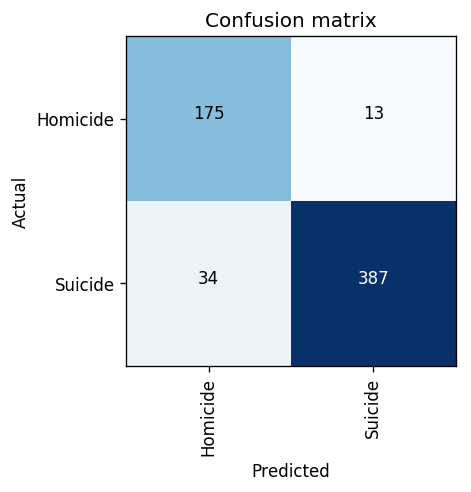

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

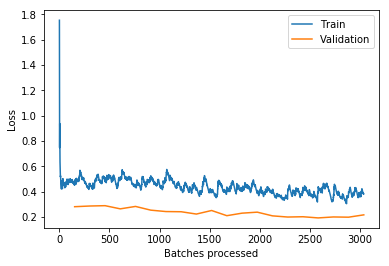

In [25]:
learn.recorder.plot_losses()

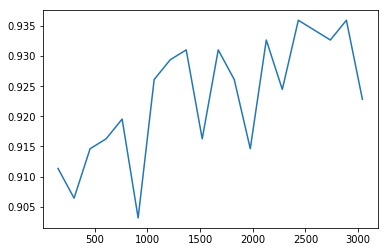

In [26]:
learn.recorder.plot_metrics()